### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
# To load dataset coupons with a csv file
data = pd.read_csv('coupons.csv')

In [ ]:
# To print the first five rows of the data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# To show general information as a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

**@Finding**

From this general information, we can see that the dataset has 12684 rows and 26 columns contain categorical (object) data and numeric values.

2. Investigate the dataset for missing or problematic data.

In [6]:
# Checking for missing data in the dataset
# The code data.isnull() checks for missing (null/NaN) values, returning True where values are missing (null) and False where they are not.
# sum() this sums up the True values for each column
missing_values = data.isnull().sum()

# Displaying the number of missing values for all columns
print("Number of missing values in each column:")
print('-------------------------------------')
print(missing_values)
print('\n**************************')

# Filter and display only columns with missing values
columns_with_missing = missing_values[missing_values > 0]
print("Columns with missing values:")
print('----------------------------')
print(columns_with_missing)

Number of missing values in each column:
-------------------------------------
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

**************************
Columns with missing values:
----------------------------
car                     12576
Bar         

In [100]:
# To retrieve all the unique values from some of columns
temperature_col= data['temperature'].unique()
weather_col= data['weather'].unique()
income_col= data['income'].unique()
coupon_col = data['coupon'].unique()
passanger_col = data['passanger'].unique()
education_col = data['education'].unique()
Bar_col = data['Bar'].unique()
car_col = data['car'].unique()
CoffeeHouse_col =data['CoffeeHouse'].unique()
age_col =data['age'].unique()

print('temperature column contains:\n', temperature_col)
print('weather column contains:\n', weather_col)
print('income column contains:\n', income_col)
print('coupon column contains:\n', coupon_col)
print('passanger column contains:\n', passanger_col)
print('education column contains:\n', education_col)
print('Bar column contains:\n', Bar_col)
print('car column contains:\n', car_col)
print('CoffeeHousecolumn contains:\n', CoffeeHouse_col)
print('Age contains:\n', age_col)

temperature column contains:
 [55 80 30]
weather column contains:
 ['Sunny' 'Rainy' 'Snowy']
income column contains:
 ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
coupon column contains:
 ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
passanger column contains:
 ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
education column contains:
 ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Bar column contains:
 [ 0.  1.  2.  8. nan  5.]
car column contains:
 [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
CoffeeHousecolumn contains:
 ['never' 'less1' '4~8' '1~3' 'gt8' nan]
Age contains:
 ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


3. Decide what to do about your missing data -- drop, replace, other...

In [35]:
# Analyze the percentage of missing data in each column
#******************************************************
# Calculate the percentage of missing data
# len(data) gives the total number of rows in data
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display the results
print("Analyzing the percentage of missing data in each column:")
print('-------------------------------------')
print(missing_percentage)

Analyzing the percentage of missing data in each column:
-------------------------------------
destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


**@Finding**

The above results show the percentage of missing data in each column, The following 6 columns have missing data: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50, where the column 'car' has the most missing data 99.1%

In [44]:
# regarding the above results of missing_percentage
# Dropping the column with high percentage of missing data (>=10%):
columns_drop = missing_percentage[missing_percentage >= 10].index
data_filtered = data.drop(columns=columns_drop)

# for small percentage (<10%): replacing with unknown
# Replace missing values in numeric columns with the mean
numeric_c= data_filtered.select_dtypes(include='number').columns
data_filtered[numeric_c] = data_filtered[numeric_c].fillna(data_filtered[numeric_c].mean())

# Replace missing object columns with "Unknown"
object_c = data_filtered.select_dtypes(include='object').columns
data_filtered[object_c] = data_filtered[object_c].fillna('Unknown')
print('-------------------------------------')
print("The object columns after filtering:")
print(object_c)
print('-------------------------------------')
print("The numeric columns after filtering:")
print(numeric_c)
print('-------------------------------------')
print("The all columns after filtering:")
print(data_filtered.columns)

-------------------------------------
The object columns after filtering:
Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')
-------------------------------------
The numeric columns after filtering:
Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')
-------------------------------------
The all columns after filtering:
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_

**@Finding**

The column 'car' removed from data, as can be seen in the list of columns of the filtered dataset data_filtered.

4. What proportion of the total observations chose to accept the coupon?



In [45]:
# The total number of observations
total_observations = len(data)
# Number of observations accepted coupon (Y = 1)
accepted_coupon = data[data["Y"]==1].shape[0]
# Calculate the proportion of the total observations chose to accept the coupon
proportional_ac_coupons= (accepted_coupon/total_observations)
proportion_ac_percentage = round(proportional_ac_coupons * 100, 2)

print("Proportion of total observations that accepted the coupon:",proportion_ac_percentage,"%")

Proportion of total observations that accepted the coupon: 56.84 %


5. Use a bar plot to visualize the `coupon` column.

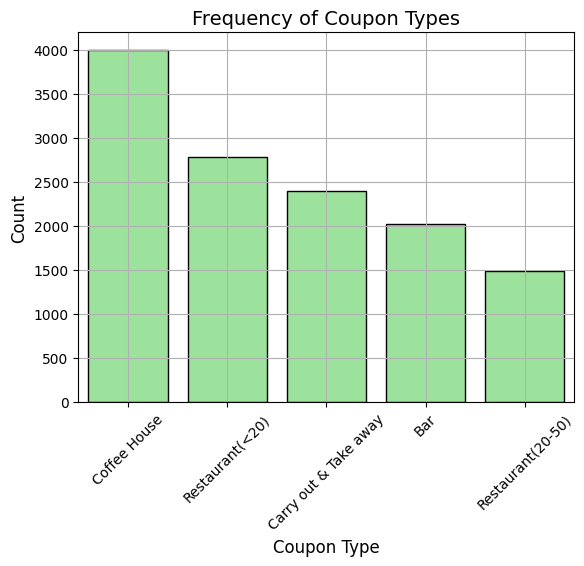

In [46]:
# counting the column 'coupon'
coupon_counts = data['coupon'].value_counts()
# Creating a bar plot using Seaborn, where
# coupon_counts.index represents the labels of the categories and
# coupon_counts.values contains the numerical data, which show the heights of
# the bars.
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, color='lightgreen', edgecolor='black')
plt.title("Frequency of Coupon Types", fontsize=14)
plt.xlabel("Coupon Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Frequency')

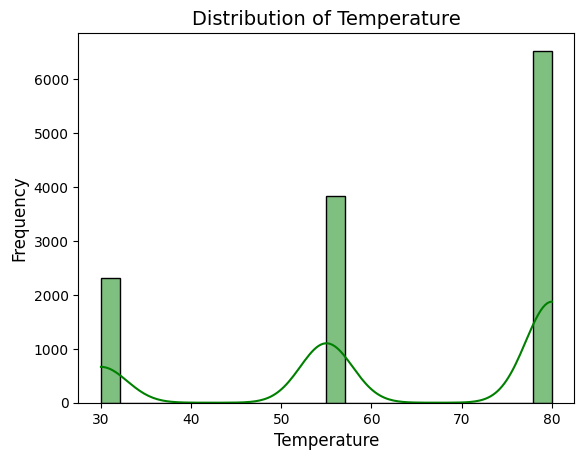

In [51]:
# Creating a histograam to visualize the distribution of numerical data by using
# Seaborn, where x-axis shows the three different categories of the temperature
# "kde=True": to estimate the probability density function of the data.
sns.histplot(data, x="temperature", kde=True, color='green')
plt.title('Distribution of Temperature', fontsize=14)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [56]:
# loading the dataset again
data = pd.read_csv('coupons.csv')
#creating the data "data_coupon_bar" by selecting rows of "data" where the
# "coupon" column has the value 'Bar'
data_coupon_bar = pd.DataFrame(data[data["coupon"]=='Bar'])
# To show the first 5 rows
data_coupon_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [63]:
# number_ac_coupon_bar shows the number of accepted coupons for bar
# selects only the rows where 'Y' equals 1.
# shape[0] returns the number of rows of "data_coupon_bar"
number_ac_coupon_bar = data_coupon_bar[data_coupon_bar['Y']==1].shape[0]
# Total bar coupons
total_bar_coupons = data[data["coupon"]=='Bar'].shape[0]
#Calculate the proportion
proportion_ac_coupon_bar = number_ac_coupon_bar/total_bar_coupons
percentage_ac_coupon_bar = round(proportion_ac_coupon_bar*100, 2)
print("Proportion of total bar coupons were accepted:",percentage_ac_coupon_bar,"%")

Proportion of total bar coupons were accepted: 41.0 %


In [64]:
# number_nac_coupon_bar shows the number of not accepted coupons for bar
# selects only the rows where 'Y' equals 0.
# shape[0] returns the number of rows of "data_coupon_bar"
number_nac_coupon_bar = data_coupon_bar[data_coupon_bar['Y']==0].shape[0]
# Total bar coupons
total_bar_coupons = data[data["coupon"]=='Bar'].shape[0]
#Calculate the proportion
proportion_nac_coupon_bar = number_nac_coupon_bar/total_bar_coupons
percentage_nac_coupon_bar = round(proportion_nac_coupon_bar*100, 2)
print("Proportion of total bar coupons were not accepted:",percentage_nac_coupon_bar,"%")

Proportion of total bar coupons were not accepted: 59.0 %


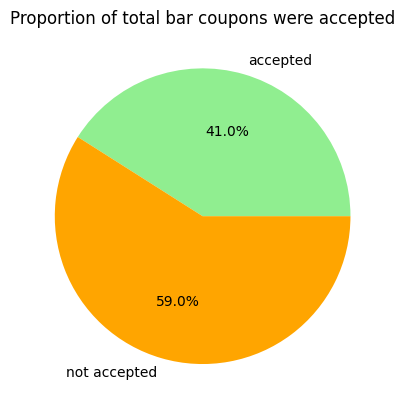

In [78]:
#create pie chart
plt.pie([percentage_ac_coupon_bar, percentage_nac_coupon_bar], labels=['accepted', 'not accepted'], colors=['lightgreen','orange'], autopct='%.1f%%')
plt.title('Proportion of total bar coupons were accepted')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [83]:
# To load again the original dataset coupons.csv
data = pd.read_csv('coupons.csv')
# The unique values of the column 'Bar'
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [98]:
# To load again the original dataset coupons.csv
data = pd.read_csv('coupons.csv')
# Mapping the unique values of 'Bar' to numerical values
bar_mapping = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 5, 'gt8': 8}
data['Bar'] = data['Bar'].map(bar_mapping)

#ThreeOrlessBar shows in the dataset who go to a bar 3 or fewer times a month
ThreeOrlessBar = data[data['Bar'] <=3]
# The total number of observations went to a bar 3 or fewer times a month
total_ThreeOrlessBar =  data[data['Bar'] <=3].shape[0]
#The number of peopel who acepted the coupon and go to a bar 3 or fewer times a month
ThreeOrlessBar_ac=ThreeOrlessBar[ThreeOrlessBar["Y"]==1].shape[0]
# acceptance rate go to a bar 3 or fewer times a month
rate_ThreeOrlessBar_ac =  round((ThreeOrlessBar_ac/total_ThreeOrlessBar)*100,2 )

#MoreThanThreeBar shows in the dataset who went to a bar more than 3 times a month
MoreThanThreeBar = data[data['Bar'] > 3]
# The total number of observations went to a bar  more than 3 times a month
total_MoreThanThreeBar =  data[data['Bar'] >3].shape[0]
MoreThanThreeBar_ac=MoreThanThreeBar[MoreThanThreeBar["Y"]==1].shape[0]
# acceptance rate went to a bar more than 3 times a month
rate_MoreThanThreeBar_ac =  round((MoreThanThreeBar_ac/total_MoreThanThreeBar)*100,2 )
#********************
# The total number of all observations who go to a bar (!=0)
Total_Bar_visiters = data[data['Bar'] >=1].shape[0]
# acceptance rate go to a bar 3 or fewer times a month to the Total_Bar_visiters
rate_ThreeOrlessBar_To_TotalBarVisitersac =   round((ThreeOrlessBar_ac/Total_Bar_visiters)*100,2 )
# acceptance rate go to a bar more than 3 times a month to the Total_Bar_visiters
rate_MoreThanThreeBar_To_TotalBarVisitersac =   round((MoreThanThreeBar_ac/Total_Bar_visiters)*100,2 )
#****************************
print("Acceptance rate for those who visit bars 3 or fewer times a month regarding to total number of their group (<=3):\n",rate_ThreeOrlessBar_ac,"%")
print("Acceptance rate for those who visit bars more than 3 times a month regarding to total number of their group (>3):\n",rate_MoreThanThreeBar_ac,"%")
#***************
print("Acceptance rate for those who visit bars 3 or fewer times a month regarding to total number of all bar visiters (<=3):\n",rate_ThreeOrlessBar_To_TotalBarVisitersac,"%")
print("Acceptance rate for those who visit bars more than 3 times a month regarding to total number of all bar visiters (>3):\n",rate_MoreThanThreeBar_To_TotalBarVisitersac,"%")

Acceptance rate for those who visit bars 3 or fewer times a month regarding to total number of their group (<=3):
 56.21 %
Acceptance rate for those who visit bars more than 3 times a month regarding to total number of their group (>3):
 62.25 %
Acceptance rate for those who visit bars 3 or fewer times a month regarding to total number of all bar visiters (<=3):
 84.93 %
Acceptance rate for those who visit bars more than 3 times a month regarding to total number of all bar visiters (>3):
 12.02 %


**@Finding**\
Frequent bar-goers (>3 visits/month) are more likely to accept bar coupons on an individual basis (higher acceptance rate within their group).
However, the majority of total coupon acceptances come from less frequent bar-goers (<=3 visits/month), likely due to their larger representation in the population.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [101]:
# To load again the original dataset coupons.csv
data = pd.read_csv('coupons.csv')
# The unique values of column 'age'
age_col =data['age'].unique()
print(age_col)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [103]:
# To load again the original dataset coupons.csv
data = pd.read_csv('coupons.csv')
#using a dictionary to map str of age to numeric values
age_mapping = {
    'below21':20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}

# Map the values in the age column
data['Age'] = data['age'].map(age_mapping)
#
# Mapping the features of 'Bar' to numerical values
bar_mapping = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 5, 'gt8': 8}
data['Bar'] = data['Bar'].map(bar_mapping)

# The following steps are to build the first group (Group1) of the drivers
# who go to a bar more than once a month and
# are over 25 and accepted the coupons
MoreThanOneBar = data[data['Bar'] > 1]
number_MoreThanOneBar = MoreThanOneBar.shape[0]
# The number of drivers over 25 who go to a bar more than once a month
Over25_MoreThanOneBar =MoreThanOneBar[MoreThanOneBar['Age']>25]
total_Over25_MoreThanOneBar =Over25_MoreThanOneBar.shape[0]
# Building Group1: Drivers over 25 who go to a bar more than once a month and accepted the coupons
Group1 =Over25_MoreThanOneBar[Over25_MoreThanOneBar['Y']==1]
number_Group1 = Group1.shape[0]
#acceptance rate of drivers over 25
rate_Group1 = round((number_Group1/total_Over25_MoreThanOneBar)*100,2)
# print the result
print("Group 1 is drivers who go to a bar more than once a month and are over the age of 25:",rate_Group1,"%")

# The following steps are to build the other group (Group2) of the drivers accepted coupons
# who go to a bar once a month or less, "or"
# they are 25 years old or younger.

# Group2_general, who
# go to a bar once a month or less, or
# are 25 years old or younger.
Group2_general = data[(data['Bar'] <= 1) | (data['Age'] <= 25)]
total_Group2_general = Group2_general.shape[0]
# Group2 presents the drivers of Group2_general who accepted the coupons
Group2 =Group2_general[Group2_general['Y']==1]
number_Group2 = Group2.shape[0]
#acceptance rate of drivers over 25
rate_Group2 = round((number_Group2/total_Group2_general)*100,2)
# print the result
print("Group 2 is drivers who go to a bar once a month or less, or are 25 years old or younger.:",rate_Group2,"%")

Group 1 is drivers who go to a bar more than once a month and are over the age of 25: 62.15 %
Group 2 is drivers who go to a bar once a month or less, or are 25 years old or younger.: 55.4 %


**@Finding**

Older and more frequent bar-goers (Group 1) are more likely to accept bar-related coupons compared to the younger and less frequent visitors (Group 2).

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# To load again the original dataset coupons.csv
data = pd.read_csv('coupons.csv')

# Mapping the features of 'Bar' to numerical values
bar_mapping = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 5, 'gt8': 8}
data['Bar'] = data['Bar'].map(bar_mapping)

# Building GroupX_general based on the following conditions:
#  Bar > 1
# passanger is not Kid(s)
# occupation is not "Farming, Fishing, and Forestry"
# additional to these, the Goupx accepted the coupon Y == 1
Groupx_general = data[(data['Bar'] > 1) & (data['passanger'] != "Kid(s)") &  (data['occupation'] != "Farming, Fishing, and Forestry")]
total_Groupx_general = Groupx_general.shape[0]
Groupx = data[(data['Bar'] > 1) & (data['passanger'] != "Kid(s)")  & (data['occupation'] != "Farming, Fishing, and Forestry") & (data['Y']== 1)]
nr_Groupx = Groupx.shape[0]
rate_Groupx = round((nr_Groupx/total_Groupx_general)*100,2)

# print the result
print("The rate of Groupx who accepted coupon is:",rate_Groupx,"%")


The rate of Groupx who accepted coupon is: 62.31 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



The acceptance_rates for 1. Condition is 62.31 %
The acceptance_rates for 2. Condition is 61.38 %
The acceptance_rates for 3. Condition is 63.12 %


Text(0.5, 1.0, 'Acceptance Rate Comparison by Conditions')

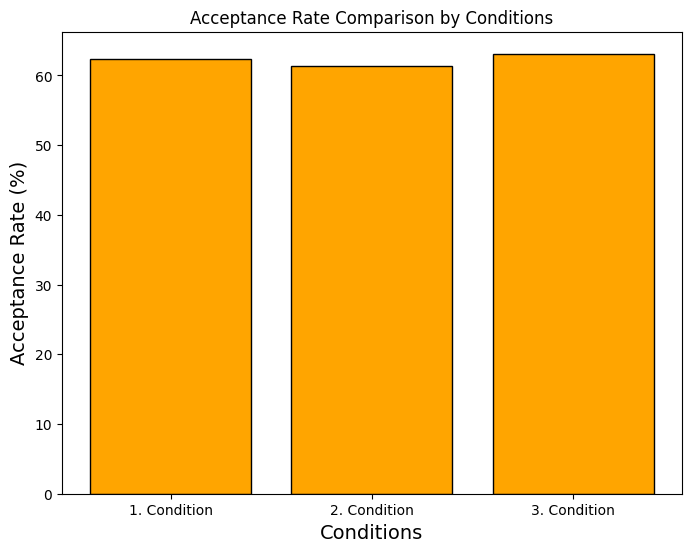

In [110]:
from statistics import mean
# To load again the original dataset coupons.csv
data = pd.read_csv('coupons.csv')

# Mapping:
# 1. Mapping the features of 'Bar' to numerical values
bar_mapping = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 5, 'gt8': 8}
data['Bar'] = data['Bar'].map(bar_mapping)

#2. Mapping by using a dictionary to map str of age to numeric values
age_mapping = {
    'below21':20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}

# Map the values in the age column
data['Age'] = data['age'].map(age_mapping)

# 3. Mapping the 'income'-range to the respective mean-values
income_mapping = {
    '$12500 - $24999': round(mean([12500, 24999])),
    '$25000 - $37499': round(mean([25000, 37499])),
    '$37500 - $49999': round(mean([37500, 49999])),
    '$50000 - $62499': round(mean([50000, 62499])),
    '$62500 - $74999': round(mean([62500, 74999])),
    '$75000 - $87499': round(mean([75000 , 87499])),
    '$87500 - $99999': round(mean([87500, 99999]))
}
data['income'] = data['income'].map(income_mapping)

# 1: Building Groupx1 for drivers with the following condition:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
Groupx1 = data[(data['Bar'] > 1) & (data['passanger'] != "Kid(s)") & (data['maritalStatus'] != "Widowed")]
# Groupx1_ac accepted coupon
Groupx1_ac= Groupx1[Groupx1['Y']==1]
#rate of Groupx1_ac
rate_Groupx1_ac = round((Groupx1_ac.shape[0]/Groupx1.shape[0])*100,2)

# 2: Building Groupx2 for drivers with the following condition:
# go to bars more than once a month and are under the age of 30
Groupx2 = data[(data['Bar'] > 1) & (data['Age'] > 30)]
# Groupx2_ac accepted coupon
Groupx2_ac= Groupx2[Groupx2['Y'] ==1]
#rate of Groupx2_ac
rate_Groupx2_ac = round((Groupx2_ac.shape[0]/Groupx2.shape[0])*100,2)

# 3: Building Groupx3 for drivers with the following condition:
# go to cheap restaurants more than 4 times a month and income is less than 50K
Groupx3 = data[(data['Bar'] > 1) & (data['income'] < 50_000)]
# Groupx3_ac accepted coupon
Groupx3_ac= Groupx3[Groupx3['Y']==1]
#rate of Groupx3_ac
rate_Groupx3_ac = round((Groupx3_ac.shape[0]/Groupx3.shape[0])*100,2)

# Printing results
groups = ['1. Condition', '2. Condition', '3. Condition']
acceptance_rates = [rate_Groupx1_ac, rate_Groupx2_ac, rate_Groupx3_ac]
print("The acceptance_rates for", groups[0], 'is', acceptance_rates[0],'%')
print("The acceptance_rates for", groups[1], 'is', acceptance_rates[1],'%')
print("The acceptance_rates for", groups[2], 'is', acceptance_rates[2],'%')

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(groups, acceptance_rates, color='orange', edgecolor="black")
plt.xlabel('Conditions', size=14)
plt.ylabel('Acceptance Rate (%)', size=14)
plt.title('Acceptance Rate Comparison by Conditions')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**@Finding**

The third group (Groupx3) drivers with lower incomes (< $50K) has higher acceptance rate.
It might be they accepted coupons as an opportunity for cost savings, potentially making them more receptive to bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# This section compare the acceptance rates of coupons based on whether passengers have children
#To load again the original dataset coupons.csv
data = pd.read_csv('coupons.csv')

with_children = data[data['has_children'] == 1]
without_children = data[data['has_children'] == 0]

# Calculate acceptance rate with children
ac_with_children = with_children[with_children['Y'] ==1]
ac_rate_with_children =round((ac_with_children.shape[0]/with_children.shape[0])*100, 2)

# Calculate acceptance rate without children
ac_without_children = without_children[without_children['Y'] ==1]
ac_rate_without_children =round((ac_without_children.shape[0]/without_children.shape[0])*100, 2)

# Print results
print("Acceptance rate for passengers with children:",ac_rate_with_children,"%")
print("Acceptance rate for passengers without children:",ac_rate_without_children,"%")



Acceptance rate for passengers with children: 54.16 %
Acceptance rate for passengers without children: 58.74 %


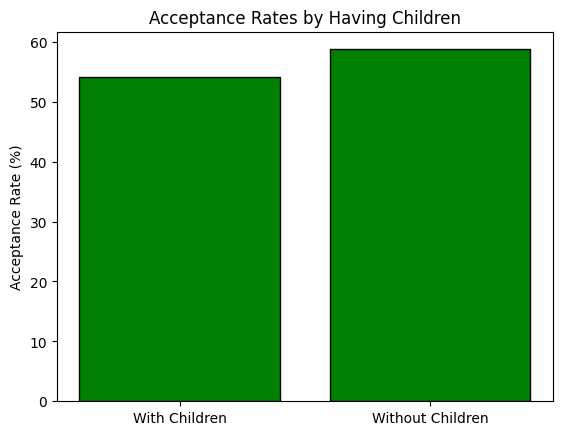

In [ ]:
# Visualization
groups = ['With Children', 'Without Children']
ac_rates = [ac_rate_with_children, ac_rate_without_children]

# Create a bar plot
plt.bar(groups, ac_rates, color='green', edgecolor="black")
plt.title('Acceptance Rates by Having Children')
plt.ylabel('Acceptance Rate (%)')
plt.show()

**@Finding**

The drivers without children have a higher tendency to accept coupons.
This can help the targeted coupon strategies, to offer coupons for those without children